In [1]:
#Importin libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Importing up-to-date project data frame:

#Loading the combined DataFrame from the pickle file
combined_file_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\4. Python Fundamentals for Data Analysts\Data from nstacart Basket Analysis\02 Data\Prepared Data\4.3_orders_products\combined_df.pkl'
combined_df = pd.read_pickle(combined_file_path)

In [11]:
combined_df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,First Name,Surname,Gender,state,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,11.114836,196,1,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,11.114836,14084,2,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,11.114836,12427,3,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,11.114836,26088,4,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,11.114836,26405,5,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [34]:
combined_df.shape

(32404859, 32)

In [5]:
# Set the folder path for saving charts as 'png.' format
folder_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\4. Python Fundamentals for Data Analysts\07-2024 Instacart Basket Analysis\04 Analysis\Visualizations\Final Viz'

### • Creating basic charts looking for data quality:

C:\Users\isaac\AppData\Local\Temp\ipykernel_7236\1642294818.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='order_dow', data=combined_df, order=order_dow_sorted, palette='viridis')


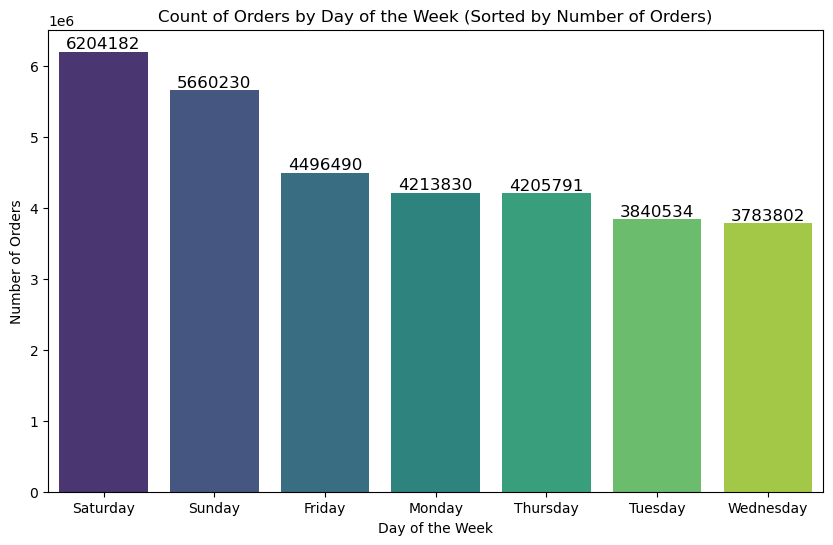

In [7]:
# Mapping day of the week numbers to day names
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}
combined_df['order_dow'] = combined_df['order_dow'].map(day_names)

# Calculating the count of orders for each day of the week and sort them in descending order
order_dow_sorted = combined_df['order_dow'].value_counts().sort_values(ascending=False).index

# Creating the bar chart, specifying the order of the bars
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='order_dow', data=combined_df, order=order_dow_sorted, palette='viridis')

# Adding the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Setting title and labels
plt.title('Count of Orders by Day of the Week (Sorted by Number of Orders)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# Saving the figure
plt.savefig(os.path.join(folder_path, 'orders_by_dow.png'))

# Displaying the plot
plt.show()

In [23]:
combined_df['order_dow'].()

32404859

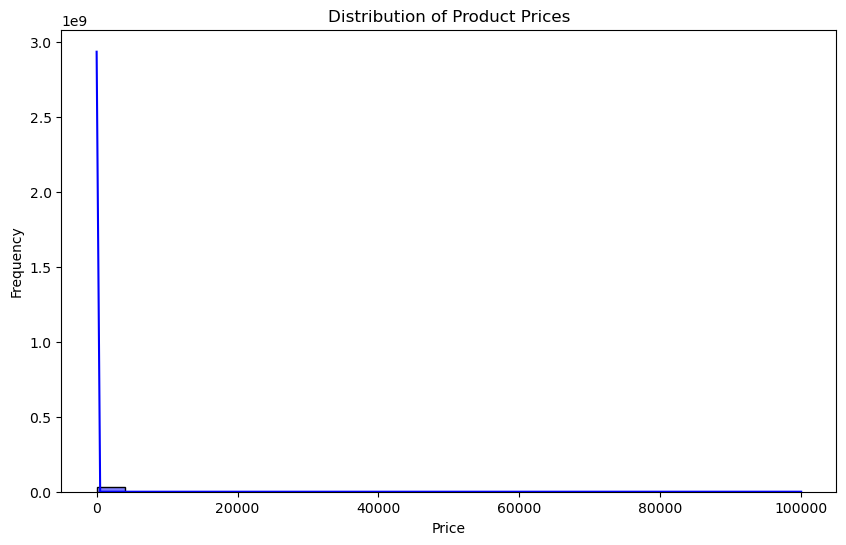

In [24]:
# Histogram for distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['prices'], bins=25, kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The chart looks like there is a data inconsistency 

In [27]:
#Data consistency check in the price variable:
combined_df['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

Looking at the max values there are outliers

In [32]:
#Checking how many rows with outliers the data frame has
combined_df.loc[combined_df['prices'] > 100]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,First Name,Surname,Gender,state,Age,date_joined,n_dependants,fam_status,income
1576,912404,17,12,2,14,5.000000,21553,5,0,both,...,Frequent customer,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659
1638,603376,17,22,6,16,4.000000,21553,3,1,both,...,Frequent customer,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659
16522,3264360,135,2,2,21,13.000000,21553,6,0,both,...,Regular customer,nan,Chen,Female,Maryland,30,3/19/2017,3,married,120635
16528,892534,135,3,0,8,12.000000,21553,3,1,both,...,Regular customer,nan,Chen,Female,Maryland,30,3/19/2017,3,married,120635
53672,229704,342,8,1,19,30.000000,21553,9,0,both,...,Regular customer,Ruby,Bates,Female,Minnesota,56,8/23/2018,2,married,187328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.000000,21553,17,1,both,...,Frequent customer,Jeremy,Vang,Male,Kentucky,62,10/2/2017,0,divorced/widowed,302526
32347717,2504315,205818,3,5,15,3.000000,21553,13,0,both,...,Regular customer,James,Hunter,Male,Maryland,60,7/12/2019,1,married,172539
32347727,1108388,205818,5,4,5,1.000000,21553,5,1,both,...,Regular customer,James,Hunter,Male,Maryland,60,7/12/2019,1,married,172539
32380527,1916142,206049,1,2,17,11.114836,21553,2,0,both,...,Regular customer,Louise,Leal,Female,District of Columbia,23,4/26/2019,1,married,169022


<Axes: xlabel='prices', ylabel='prices'>

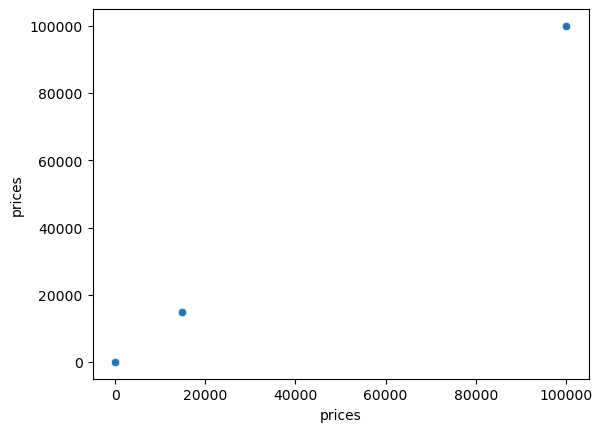

In [39]:
sns.scatterplot(x = 'prices', y = 'prices',data = combined_df)

Confirming the outliers, there are 5,127 rows in the data frame that represent only the 0.015% of total data 

-------------------------------------------------------------------------------------------------

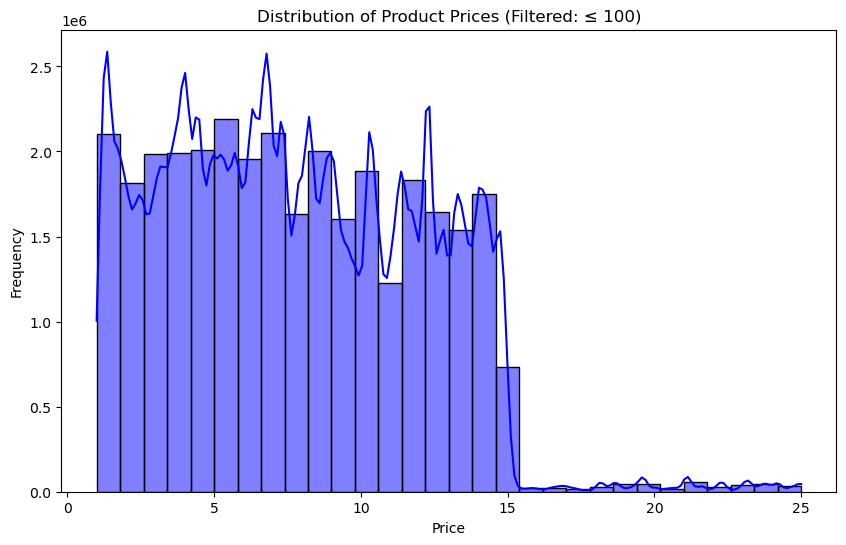

In [116]:
# Filter the DataFrame to include only prices less than or equal to 100
filtered_df = combined_df[combined_df['prices'] <= 100]

# Create the histogram for the filtered prices
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['prices'], bins=30, kde=True, color='blue')
plt.title('Distribution of Product Prices (Filtered: ≤ 100)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig(os.path.join(folder_path, 'filtered_prices_histogram.png'))
plt.show()

-----------------------------------------------------------------------------------------------

###  Creating a line chart using a data sample (20%)

Splitting 'combined_df' data frame into two samples with an 80/20 uniform distribution

In [9]:
#Ensure reproducibility
np.random.seed(4)

#Creating a boolean mask for the 80% subset (sample)
dev = np.random.rand(len(combined_df)) <= 0.8

# Split the data
big = combined_df[dev]
small = combined_df[~dev]

In [53]:
#Checking subsetting:
dev

array([False,  True, False, ...,  True,  True,  True])

In [49]:
len(combined_df)

32404859

In [51]:
len(big) + len(small)

32404859

order_dow values where missed during plitting 'combined_df' data frame into two samples with an 80/20 uniform distribution.
Therefore, I will proced to add it back

In [34]:
# Restore 'order_dow' in small using .loc to avoid SettingWithCopyWarning
small.loc[:, 'order_dow'] = combined_df.loc[~dev, 'order_dow']

# Check if the column now contains valid values
print(small['order_dow'].unique())  # This should now show the correct day-of-week values (0-6)

['Monday' 'Tuesday' 'Wednesday' 'Sunday' 'Saturday' 'Friday' 'Thursday']


### Creating the line chart using the small subset

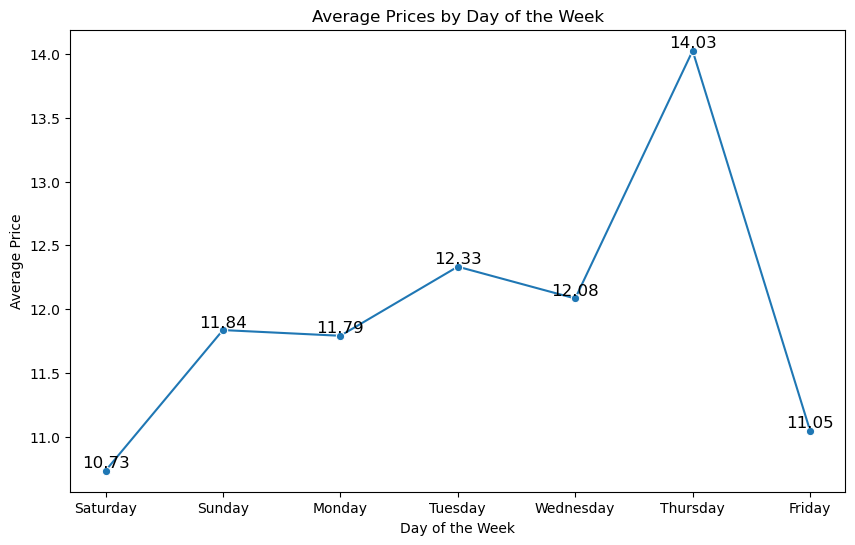

In [38]:
# Creating a subset for the required columns
df_2 = small[['order_dow', 'prices']]

# Aggregating the data to get the average prices by day of the week
df_avg_prices = df_2.groupby('order_dow')['prices'].mean().reset_index()

# Sorting days in the correct order
df_avg_prices['order_dow'] = pd.Categorical(df_avg_prices['order_dow'], 
                                            categories=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 
                                            ordered=True)

# Creating the line chart
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_avg_prices, x='order_dow', y='prices', marker='o')

# Adding the accurate count (average price) on top of each point
for x, y in zip(df_avg_prices['order_dow'], df_avg_prices['prices']):
    ax.text(x=x, y=y, s=f'{y:.2f}', ha='center', va='bottom', fontsize=12)

# Setting title and labels
plt.title('Average Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')

# Saving the figure
plt.savefig(os.path.join(folder_path, 'linechart_prices_by_dow.png'))

# Displaying the plot
plt.show()

--------------------------------------------------------------------------------------------------

### Distribution of Orders by Hour of the Day

Creating a histogram of the “order_hour_of_day” column to provide descriptive findings about sales

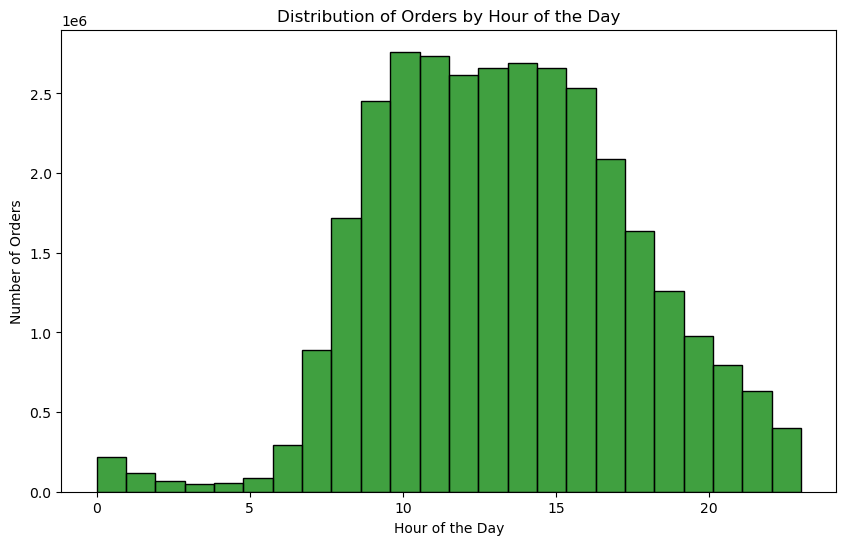

In [120]:
# Create the histogram for the "order_hour_of_day" column
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['order_hour_of_day'], bins=24, kde=False, color='green')
plt.title('Distribution of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.savefig(os.path.join(folder_path, 'orders_by_hour_histogram.png'))
plt.show()

### Descriptive Findings

The histogram above illustrates the distribution of orders throughout the day, measured by the `order_hour_of_day` column. 

Key observations:
- **Peak Hours**: The highest concentration of orders occurs between **10 AM and 3 PM**, with a notable peak around **12 PM (noon)**. This suggests that midday is the busiest period for placing orders.
- **Morning Activity**: There is also significant ordering activity starting from **8 AM**, gradually increasing towards noon.
- **Evening Decline**: After 3 PM, there is a sharp decline in the number of orders, with relatively low activity during the late evening and night hours.

These findings indicate that most Instacart users tend to place their orders during the late morning to early afternoon, likely influenced by daily routines and meal planning.


----------------------------------------------------------------------------------------------------

### Loyalty Distribution

Creating a bar chart from the 'loyalty_flag' column to research in the distribution of orders among customers in terms of loyalty **using 20% sample**

C:\Users\isaac\AppData\Local\Temp\ipykernel_6884\2354503890.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loyalty_flag', data=small, palette='viridis', order=small['loyalty_flag'].value_counts().index)


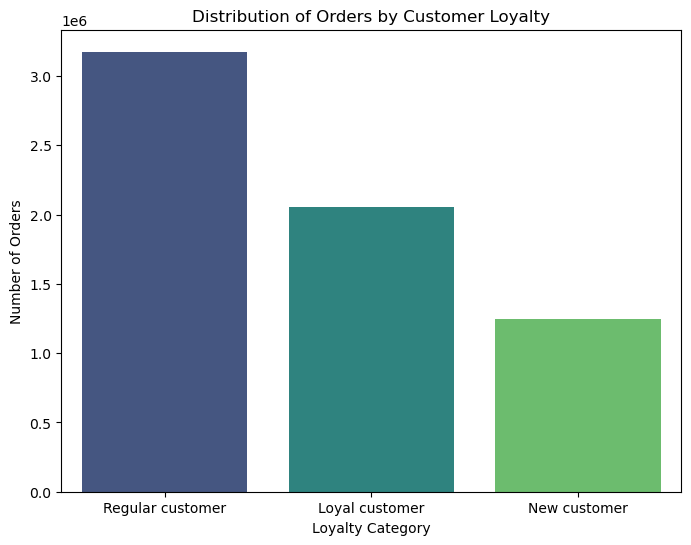

In [122]:
# Create the bar chart for the "loyalty_flag" column
plt.figure(figsize=(8, 6))
sns.countplot(x='loyalty_flag', data=small, palette='viridis', order=small['loyalty_flag'].value_counts().index)
plt.title('Distribution of Orders by Customer Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Orders')
plt.savefig(os.path.join(folder_path, 'loyalty_flag_barchart.png'))
plt.show()

-------------------------------------------------------------------------------------------------

### Expenditure Difference

Checking whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

C:\Users\isaac\AppData\Local\Temp\ipykernel_6884\3555488315.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=small, x='order_hour_of_day', y='prices', marker='o', ci=None)


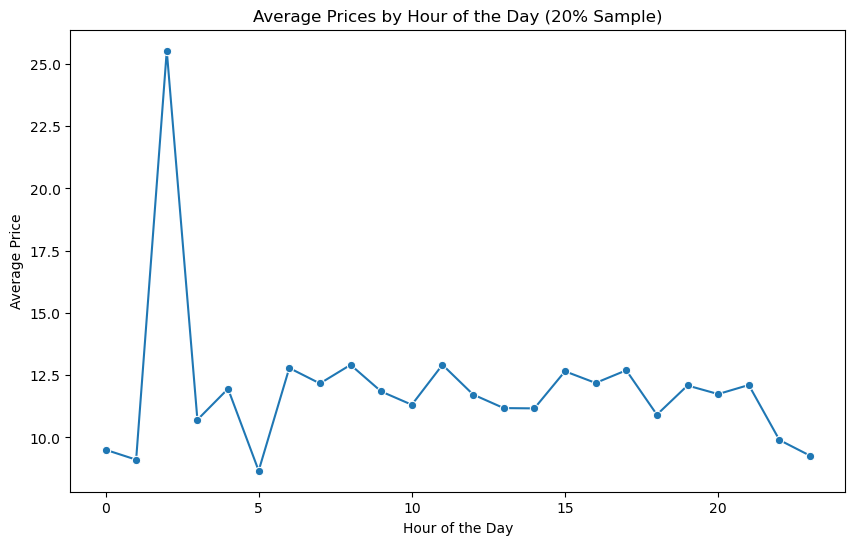

In [124]:
# Create the line chart using the small subset

plt.figure(figsize=(10, 6))
sns.lineplot(data=small, x='order_hour_of_day', y='prices', marker='o', ci=None)
plt.title('Average Prices by Hour of the Day (20% Sample)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.savefig(os.path.join(folder_path, 'linechart_prices_by_hour.png'))
plt.show()

-----------------------------------------------------------------------------------------------

### Exploratory Analysis of Customer Demographics

Determining whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents **using data sample (20%)**.

C:\Users\isaac\AppData\Local\Temp\ipykernel_6884\80898736.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=small, x='Age', y='n_dependants', marker='o', ci=None)


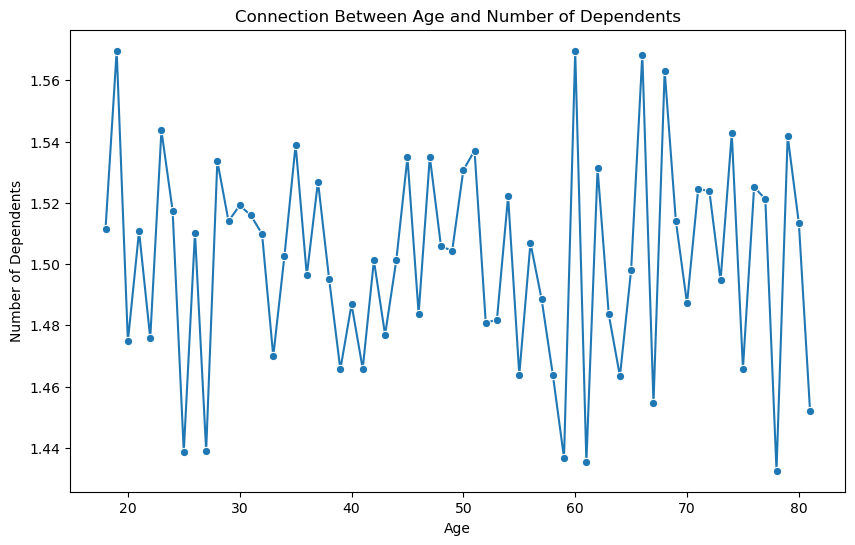

In [126]:
#Creating the line chart for age and number of dependents

plt.figure(figsize=(10, 6))
sns.lineplot(data=small, x='Age', y='n_dependants', marker='o', ci=None)
plt.title('Connection Between Age and Number of Dependents')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')
plt.savefig(os.path.join(folder_path, 'age_vs_dependants_linechart.png'))
plt.show()


### Descriptive Findings

The line chart illustrates the relationship between the age of customers and the number of dependents they have.

Key observations:
- **High Variability**: The number of dependents fluctuates significantly across different age groups. This suggests that there is no strong, consistent trend in the number of dependents as age increases.
- **Peaks in Early 20s and Late 50s**: There are noticeable peaks in the number of dependents for customers in their early 20s and late 50s. This could be due to younger customers starting families early and older customers potentially having grandchildren or other dependents.
- **Slight Decrease in 30s and 40s**: There is a slight decrease in the number of dependents for customers in their 30s and 40s, followed by an increase in their late 40s and 50s.

This analysis suggests that while age does impact the number of dependents, the relationship is not linear or straightforward. The marketing team may need to consider other factors in addition to age when targeting customers based on their family situation.


-------------------------------------------------------------------------------------------------

### Exploring a Connection Between Age and Spending Power 

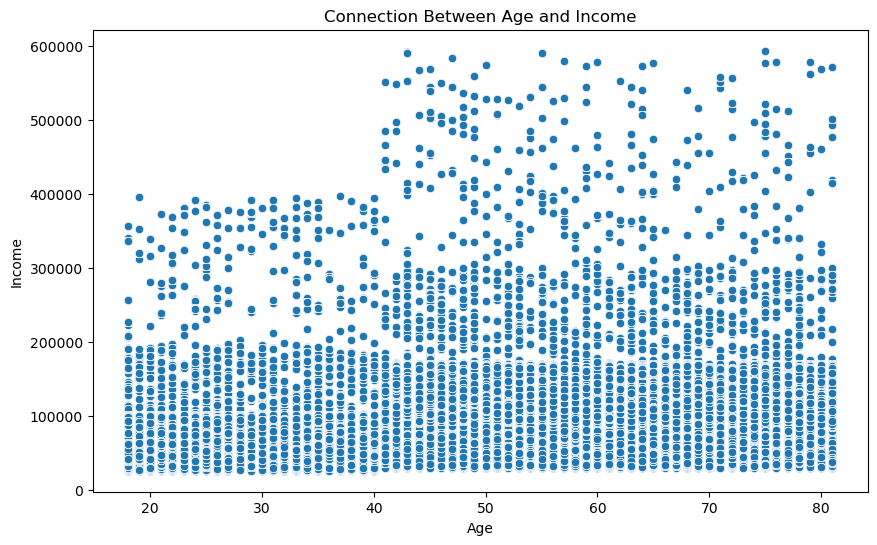

In [128]:
#Creating the scatterplot using 20% data sample
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='income', data=small)

#Adding title and labels
plt.title('Connection Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.savefig(os.path.join(folder_path, 'scatterplot_age_vs_income.png'))
plt.show()